In [1]:
import numpy as np
import torch
import torchquantum as tq
from torchquantum.pulse import sigmai, sigmax, sigmay, sigmaz, sesolve, InitialState
import matplotlib.pyplot as plt
from qutip import Bloch
from utils import *

In [2]:
n_dt = 160
dt = 0.22 # ns

In [3]:
psi = InitialState(n_qubit = 1, state = [0])

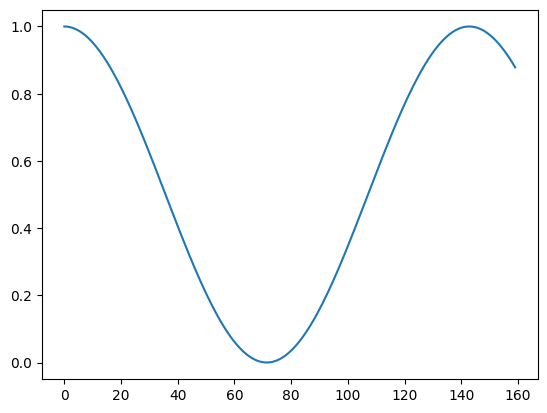

In [4]:
pulse = Schedule(0.1 * np.ones((n_dt,1)))
H = H_qubit_example(n_qubit = 1, pulse = pulse, dt = dt)
y_res = sesolve(psi0 = psi, H = H, n_dt = n_dt, dt = dt)
psi0_t = torch.abs(y_res[0][:,0]).tolist()
plt.plot([p**2 for p in psi0_t])

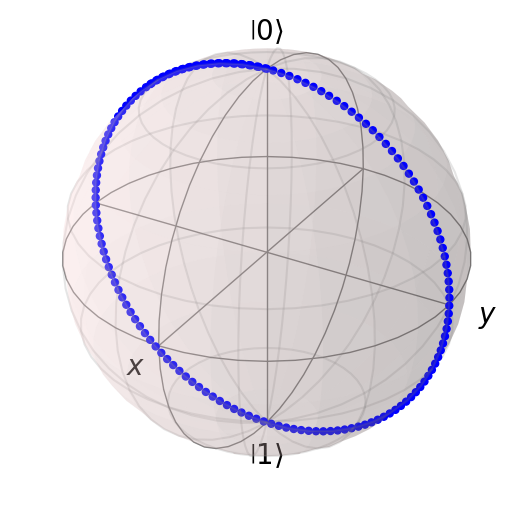

In [5]:
points = [sv2bloch(state) for state in y_res[0].tolist()]
sphere = Bloch()
sphere.add_points(np.array(points).T)
sphere.show()

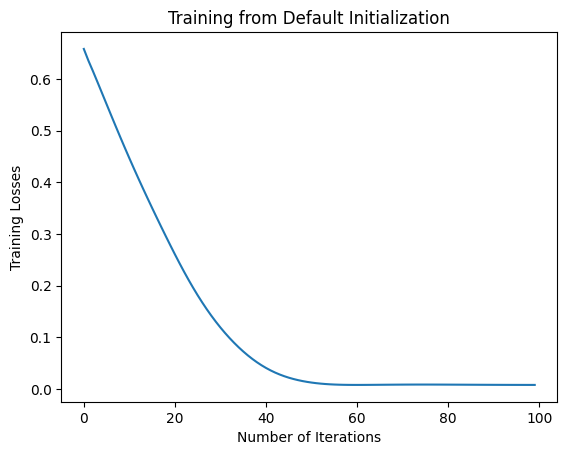

In [6]:
import torch.optim as optim

theta = np.pi/3
n_dt = 10
target_unitary = torch.tensor([[np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)]], dtype=torch.complex64)
pulse = Schedule((0.2+0.1j) * np.ones((n_dt,1)))

optimizer = optim.Adam(params=[pulse], lr=1e-2)

losses = []

for k in range(100):
    H = H_qubit_example(n_qubit = 1, pulse = pulse, dt = dt)
    solver_result = sesolve(psi0 = sigmai(), H = H, n_dt = n_dt, dt = dt)
    unitary = solver_result[0][-1]
    loss = 1 - (torch.trace(unitary @ target_unitary) / target_unitary.shape[0]).abs() ** 2 \
    + 0.1 * torch.abs(torch.diff(pulse)).sum() + 0.01 * torch.norm(pulse)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
plt.xlabel("Number of Iterations")
plt.ylabel("Training Losses")
plt.title("Training from Default Initialization")
plt.plot(losses[:100])

In [7]:
unitary

tensor([[ 8.6753e-01-3.7338e-05j,  8.1141e-04+4.9739e-01j],
        [-8.1141e-04+4.9739e-01j,  8.6753e-01+3.7338e-05j]],
       grad_fn=<SelectBackward0>)

In [8]:
target_unitary

tensor([[0.8660+0.0000j, 0.0000-0.5000j],
        [0.0000-0.5000j, 0.8660+0.0000j]])

In [9]:
H = H_qubit_example(n_qubit = 1, pulse = pulse, dt = dt)
y_res = sesolve(psi0 = psi, H = H, n_dt = n_dt, dt = dt)
psi0_t = torch.abs(y_res[0][:,0]).tolist()
# plt.plot([p**2 for p in psi0_t])

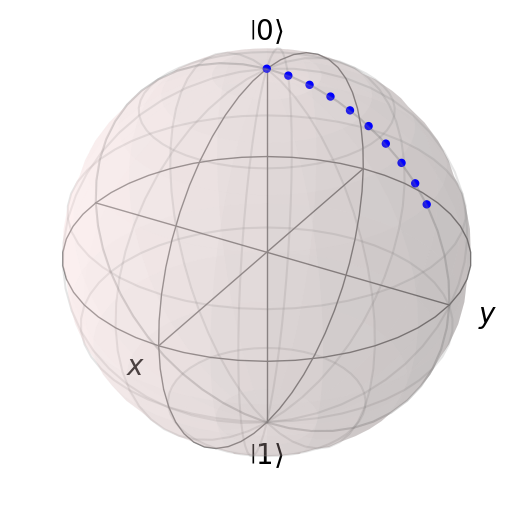

In [10]:
points = [sv2bloch(state) for state in y_res[0].tolist()]
sphere = Bloch()
sphere.add_points(np.array(points).T)
sphere.show()

In [11]:
n_dt = 160
dt = 0.22 # ns

In [12]:
pulse_values = np.arange(1,n_dt+1)/n_dt
pulse = Schedule(pulse_values)
# plt.plot(pulse_values)

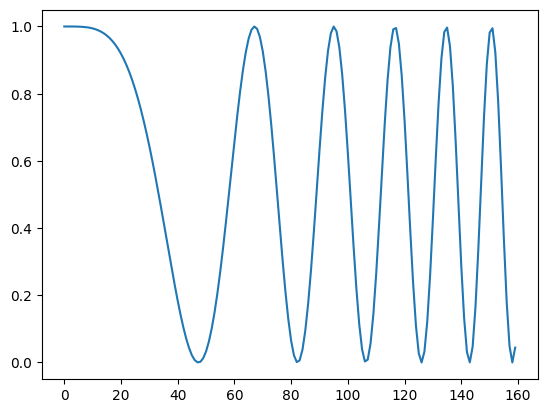

In [13]:
pulse = Schedule(pulse_values)
H = H_qubit_example(n_qubit = 1, pulse = pulse, dt = dt)
lin_res = sesolve(psi0 = psi, H = H, n_dt = n_dt, dt = dt)
linpsi0_t = torch.abs(lin_res[0][:,0]).tolist()
plt.plot([p**2 for p in linpsi0_t])

In [14]:
# points = [sv2bloch(state) for state in lin_res[0].tolist()]
# sphere = Bloch()
# sphere.add_points(np.array(points).T)
# sphere.show()

In [15]:
pulse_values = np.cos(2*np.pi/n_dt*np.arange(1,n_dt+1))/2

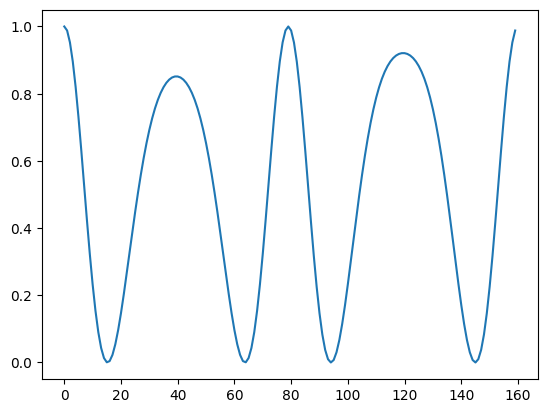

In [16]:
pulse = Schedule(pulse_values)
H = H_qubit_example(n_qubit = 1, pulse = pulse, dt = dt)
per_res = sesolve(psi0 = psi, H = H, n_dt = n_dt, dt = dt)
perpsi0_t = torch.abs(per_res[0][:,0]).tolist()
plt.plot([p**2 for p in perpsi0_t])

In [17]:
# points = [sv2bloch(state) for state in per_res[0].tolist()]
# sphere = Bloch()
# sphere.add_points(np.array(points).T)
# sphere.show()